# Predicting Future Funding to the startup's using LSTM 

# Long short-term memory:
* Long short-term memory (LSTM) is an artificial recurrent neural network (RNN) architecture used in the field of deep learning.
* LSTM is applicable to tasks such as unsegmented, connected handwriting recognition, speech recognition and anomaly detection in network traffic or IDSs (intrusion detection systems).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
import plotly
import plotly.graph_objects as go


In [2]:
data = pd.read_csv('startup_funding.csv')
data.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
data.columns=['SNo', 'Date', 'StartupName', 'IndustryVertical', 'SubVertical',
       'CityLocation', 'InvestorsName', 'InvestmentType', 'AmountInUSD',
       'Remarks']
data.shape

(3044, 10)

In [5]:
data['StartupName'] = data['StartupName'].apply(lambda x: (str(x).replace("\\\\","")))
data['StartupName'] = data['StartupName'].apply(lambda x: (str(x).replace("\"","")))

In [6]:
for i in range(0,len(data["IndustryVertical"])):
    if data["IndustryVertical"][i] in ["ECommerce",
                                       "ecommerce",
                                       "Ecommerce", 
                                       "E-Commerce",
                                       "E-commerce"]:
        data["IndustryVertical"][i]="eCommerce"
        
for i in range(0,len(data["StartupName"])):
    if data["StartupName"][i] in ["Ola",
                                  "Ola Cabs", 
                                  "Olacabs"]:
        data["StartupName"][i]="Ola"  
    elif data["StartupName"][i] =="Flipkart.com":
        data["StartupName"][i]="Flipkart"    
    elif data["StartupName"][i] =="Paytm Marketplace":
        data["StartupName"][i]="Paytm"   
for i in range(0,len(data["StartupName"])):
  if data["InvestorsName"][i] in ['Undisclosed investors',
                                  'Undisclosed Investors',
                                  'Undisclosed',
                                  'Undisclosed investor',
                                  'Undisclosed Investor',
                                  'undisclosed investors']:
    data["InvestorsName"][i]="Undisclosed"
    
for i in range(0,len(data["StartupName"])):
    if data["StartupName"][i] in ["OYO",
                                  "OYO Rooms", 
                                  "OyoRooms", 
                                  "Oyorooms", 
                                  "Oyo",
                                 "Oyo Rooms"]:
        data["StartupName"][i]= "OYO Rooms"
    elif data["StartupName"][i] in ["Byjuxe2x80x99s",
                                    "BYJU'S"]:
        data["StartupName"][i]= "Byju's"    
    
for i in range  (0,len(data["CityLocation"])):
    if data["CityLocation"][i] in ["New Delhi",
                                   "Delhi",
                                   "Noida", 
                                   "Gurugram",
                                   "Gurgaon"]:
        data["CityLocation"][i]="NCR"
    elif data["CityLocation"][i]=="Bangalore":
        data["CityLocation"][i]="Bengaluru"

data.loc[data['CityLocation'].isin(['\\\\xc2\\\\xa0Noida', '\\xc2\\xa0Noida']), 'CityLocation'] = 'Noida'
data.loc[data['CityLocation'].isin(['\\\\xc2\\\\xa0Bangalore', '\\xc2\\xa0Bangalore', 'Bangalore']), 'CityLocation'] = 'Bengaluru'
data.loc[data['CityLocation'].isin(['\\\\xc2\\\\xa0New Delhi', '\\xc2\\xa0New Delhi']), 'CityLocation'] = 'New Delhi'
data.loc[data['CityLocation'].isin(['\\\\xc2\\\\xa0Gurgaon', 'Gurugram']), 'CityLocation'] = 'Gurgaon'
data.loc[data['CityLocation'].isin(['\\\\xc2\\\\xa0Mumbai', '\\xc2\\xa0Mumbai']), 'CityLocation'] = 'Mumbai'
        

data.loc[data['IndustryVertical'] == "\\\\xc2\\\\xa0News Aggregator mobile app", 'IndustryVertical'] = 'News Aggregator mobile app'
data.loc[data['IndustryVertical'] == "\\\\xc2\\\\xa0Online Jewellery Store", 'IndustryVertical'] = 'Online Jewellery Store'
data.loc[data['IndustryVertical'] == "\\\\xc2\\\\xa0Fashion Info Aggregator App", 'IndustryVertical'] = 'Fashion Info Aggregator App'
data.loc[data['IndustryVertical'] == "\\\\xc2\\\\xa0Online Study Notes Marketplace", 'IndustryVertical'] = 'Online Study Notes Marketplace'
data.loc[data['IndustryVertical'] == "\\\\xc2\\\\xa0Warranty Programs Service Administration", 'IndustryVertical'] = 'Warranty Programs Service Administration'
data.loc[data['IndustryVertical'] == "\\\\xc2\\\\xa0Pre-School Chain", 'IndustryVertical'] = 'Pre-School Chain'
data.loc[data['IndustryVertical'] == "\\\\xc2\\\\xa0Premium Loyalty Rewards Point Management", 'IndustryVertical'] = 'Premium Loyalty Rewards Point Management'
data.loc[data['IndustryVertical'] == "\\\\xc2\\\\xa0Contact Center Software Platform", 'IndustryVertical'] = 'Contact Center Software Platform'
data.loc[data['IndustryVertical'] == "\\\\xc2\\\\xa0Casual Dining restaurant Chain", 'IndustryVertical'] = 'Casual Dining restaurant Chain'
data.loc[data['IndustryVertical'] == "\\\\xc2\\\\xa0Online Grocery Delivery", 'IndustryVertical'] = 'Online Grocery Delivery'
data.loc[data['IndustryVertical'] == "Online home d\\\\xc3\\\\xa9cor marketplace", 'IndustryVertical'] = 'Online home decor marketplace'
data.loc[data['IndustryVertical'].isin(["Fin-Tech"]), 'IndustryVertical'] = 'FinTech'   

data.loc[data['InvestorsName'].isin(['Undisclosed investors', 'Undisclosed', 'undisclosed investors', 'Undisclosed Investor', 'Undisclosed investors']), 'InvestorsName'] = 'Undisclosed Investors'
data.loc[data['InvestorsName'] == "\\\\xc2\\\\xa0Tiger Global", 'InvestorsName'] = 'Tiger Global'
data.loc[data['InvestorsName'] == "\\\\xc2\\\\xa0IndianIdeas.com", 'InvestorsName'] = 'IndianIdeas'
data.loc[data['InvestorsName'] == "\\\\xc2\\\\xa0IvyCap Ventures, Accel Partners, Dragoneer Investment Group", 'InvestorsName'] = 'IvyCap Ventures, Accel Partners, Dragoneer Investment Group'
data.loc[data['InvestorsName'] == "\\\\xc2\\\\xa0Goldman Sachs", 'InvestorsName'] = 'Goldman Sachs'

In [7]:
# Lets see percentage of present values in every column
#data.isnull().sum()
p=((data.count()/data.isna().count())*100)
display(p)
# Alternate: Lets see percentage of missing values in every column
m=(100-(data.count()/data.isna().count())*100)
display(m)

SNo                 100.000000
Date                100.000000
StartupName         100.000000
IndustryVertical     94.382392
SubVertical          69.250986
CityLocation         94.086728
InvestorsName        99.211564
InvestmentType       99.868594
AmountInUSD          68.462549
Remarks              13.764783
dtype: float64

SNo                  0.000000
Date                 0.000000
StartupName          0.000000
IndustryVertical     5.617608
SubVertical         30.749014
CityLocation         5.913272
InvestorsName        0.788436
InvestmentType       0.131406
AmountInUSD         31.537451
Remarks             86.235217
dtype: float64

In [8]:
data.drop("Remarks", axis=1, inplace=True)
data.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000"
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,NCR,Susquehanna Growth Equity,Series C,"80,48,394"
2,3,09/01/2020,Mamaearth,eCommerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860"
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,NCR,Vinod Khatumal,Pre-series A,"30,00,000"
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000"


In [9]:
data2=data.copy()
data2["AmountInUSD"].head(2)

0    20,00,00,000
1       80,48,394
Name: AmountInUSD, dtype: object

In [10]:
def DateFormatting(dates):
    try:
        date = pd.to_datetime(dates,format='%d/%m/%Y')
    except(Exception)as e:
        return pd.to_datetime("05/07/2018",format='%d/%m/%Y') if(dates == '05/072018') else None
        return pd.to_datetime("07/01/2015",format='%d/%m/%Y') if(dates == '15-01-07 00:00:00') else None
        return pd.to_datetime("10/7/2015",format='%d/%m/%Y') if(dates == '\\xc2\\xa010/7/2015') else None
        return pd.to_datetime("22/01/2015",format='%d/%m/%Y') if(dates == '22/01//2015') else None
    else:
        return date
        
    

data['Date'] = data['Date'].apply(DateFormatting)

In [11]:
import re

In [12]:
exceptionList =['unknown','Undisclosed','undisclosed']
def ConvertingDataIntoFloat(money):
    match = ''
    if((type(money)!=float)):
        match = re.match(r'(\\\\xc2\\\\xa0)(.*)',money)
    try:
        if(money not in exceptionList and (type(money)!=float) and bool(re.match(r'\\\\xc2\\\\xa0.*',money))==False):
            if('+' in money and (',' in money)):
                return float(money.replace('+','').replace(',',''))
            elif('+' in money and (',' in money)!=True):
                return float(money.replace('+',''))
            elif(',' in money):
                return float(money.replace(',',''))
        elif(money in exceptionList):
            return np.nan
        elif(match):
            if(match.group(2)=='N/A'):
                return np.nan
            else:
                return float(match.group(2).replace(',',''))
    except(Exception)as e:
        print(e,end='\t')
        print(money)
    else:
        if(type(money)==str):
            return float(money)
        else:
            return money
        
data['AmountInUSD'] = data['AmountInUSD'].apply(ConvertingDataIntoFloat)

In [13]:
df1=data.copy()
df1.isna().sum()

SNo                   0
Date                  7
StartupName           0
IndustryVertical    171
SubVertical         936
CityLocation        180
InvestorsName        24
InvestmentType        4
AmountInUSD         971
dtype: int64

In [14]:
df1['InvestmentType']=df1['InvestmentType'].fillna(method='ffill')
df1['IndustryVertical']=df1['IndustryVertical'].fillna(method='ffill')
df1['CityLocation']=df1['CityLocation'].fillna(method='ffill')
df1['SubVertical']=df1['SubVertical'].fillna(method='ffill')
df1["AmountInUSD"]=df1["AmountInUSD"].fillna(0)

In [15]:
df1=df1.drop(['StartupName','InvestorsName'],axis=1)
df1.head()

,SNo,Date,IndustryVertical,SubVertical,CityLocation,InvestmentType,AmountInUSD
0,1,2020-01-09,E-Tech,E-learning,Bengaluru,Private Equity Round,200000000.0
1,2,2020-01-13,Transportation,App based shuttle service,NCR,Series C,8048394.0
2,3,2020-01-09,eCommerce,Retailer of baby and toddler products,Bengaluru,Series B,18358860.0
3,4,2020-01-02,FinTech,Online Investment,NCR,Pre-series A,3000000.0
4,5,2020-01-02,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Seed Round,1800000.0


In [16]:
df1.isna().sum()

SNo                 0
Date                7
IndustryVertical    0
SubVertical         0
CityLocation        0
InvestmentType      0
AmountInUSD         0
dtype: int64

## Reformat the Date Time Columns

In [17]:
dataset = df1
dataset["Month"] = pd.to_datetime(df1["Date"]).dt.month
dataset["Year"] = pd.to_datetime(df1["Date"]).dt.year
dataset["Date"] = pd.to_datetime(df1["Date"]).dt.date
dataset["Time"] = pd.to_datetime(df1["Date"]).dt.time
dataset["Week"] = pd.to_datetime(df1["Date"]).dt.week
dataset["Day"] = pd.to_datetime(df1["Date"]).dt.day_name()
dataset = df1.set_index("Date")
dataset.index = pd.to_datetime(dataset.index)
dataset.head(1)

,SNo,IndustryVertical,SubVertical,CityLocation,InvestmentType,AmountInUSD,Month,Year,Time,Week,Day
Date,,,,,,,,,,,
2020-01-09,1,E-Tech,E-learning,Bengaluru,Private Equity Round,200000000.0,1.0,2020.0,00:00:00,2.0,Thursday


In [18]:
print(df1.Year.unique(),"\n")
print("Total Number of Unique Year", df1.Year.nunique(), "\n")

[2020. 2019. 2018. 2017. 2016. 2015.   nan] 

Total Number of Unique Year 6 



## Resampleing Data:
* Resampling involves changing the frequency of your time series observations.
* Two types of resampling are:
1. Upsampling: Where you increase the frequency of the samples, such as from minutes to seconds.
2. Downsampling: Where you decrease the frequency of the samples, such as from days to months.

We are using Downsampling

In [19]:
NewDataSet = dataset.resample('D').mean()

In [20]:
NewDataSet["AmountInUSD"]=NewDataSet["AmountInUSD"].ffill().bfill()

In [21]:
NewDataSet["AmountInUSD"].isna().sum()

0

In [22]:
print("Old Dataset ",dataset.shape )
print("New  Dataset ",NewDataSet.shape )

Old Dataset  (3044, 11)
New  Dataset  (1838, 5)


In [23]:
NewDataSet

,SNo,AmountInUSD,Month,Year,Week
Date,,,,,
2015-01-02,2990.5,1232500.0,1.0,2015.0,1.0
2015-01-03,NaN,1232500.0,NaN,NaN,NaN
2015-01-04,NaN,1232500.0,NaN,NaN,NaN
2015-01-05,2993.0,3505000.0,1.0,2015.0,2.0
2015-01-06,2997.0,2377000.0,1.0,2015.0,2.0
...,...,...,...,...,...
2020-01-09,2.0,109179430.0,1.0,2020.0,2.0
2020-01-10,7.0,150000000.0,1.0,2020.0,2.0
2020-01-11,NaN,150000000.0,NaN,NaN,NaN


In [24]:
NewDataSet=NewDataSet.drop(["SNo"],axis=1)

In [25]:
NewDataSet.iloc[:,0:1]


,AmountInUSD
Date,
2015-01-02,1232500.0
2015-01-03,1232500.0
2015-01-04,1232500.0
2015-01-05,3505000.0
2015-01-06,2377000.0
...,...
2020-01-09,109179430.0
2020-01-10,150000000.0
2020-01-11,150000000.0


In [34]:
TestData = NewDataSet.tail(100)

Training_Set = NewDataSet.iloc[:,0:1]

Training_Set = Training_Set[:-60]

In [27]:
Training_Set

,AmountInUSD
Date,
2015-01-02,1232500.0
2015-01-03,1232500.0
2015-01-04,1232500.0
2015-01-05,3505000.0
2015-01-06,2377000.0
...,...
2019-11-10,0.0
2019-11-11,300000.0
2019-11-12,1300000.0


In [28]:
print("Training Set Shape ", Training_Set.shape)
print("Test Set Shape ", TestData.shape)

Training Set Shape  (1778, 1)
Test Set Shape  (100, 4)


In [29]:
from sklearn.preprocessing import MinMaxScaler
Training_Set = Training_Set.values
sc = MinMaxScaler(feature_range=(0, 1))
Train = sc.fit_transform(Training_Set)


In [30]:
X_Train = []
Y_Train = []

# Range should be fromm 60 Values to END 
for i in range(60, Train.shape[0]):
    
    # X_Train 0-59 
    X_Train.append(Train[i-60:i])
    
    # Y Would be 60 th Value based on past 60 Values 
    Y_Train.append(Train[i])

# Convert into Numpy Array
X_Train = np.array(X_Train)
Y_Train = np.array(Y_Train)

print(X_Train.shape)
print(Y_Train.shape)

(1718, 60, 1)
(1718, 1)


In [31]:
X_Train = np.reshape(X_Train, newshape=(X_Train.shape[0], X_Train.shape[1], 1))
X_Train.shape

(1718, 60, 1)

In [32]:
import plotly.graph_objs as go

#import Keras
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import Adam 
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
from keras.layers import LSTM
from sklearn.model_selection import KFold, cross_val_score, train_test_split

# Model

### Sequential model in Keras:
It is used to build models as a simple stack of layers. First, you instantiate your Sequential model object and then, you add layers to it one by one using the add() method.

An issue with LSTMs is that they can easily overfit training data, reducing their predictive skill.

Dropout is a regularization method where input and recurrent connections to LSTM units are probabilistically excluded from activation and weight updates while training a network. This has the effect of reducing overfitting and improving model performance.

In [39]:
from keras.layers.core import Dense, Activation, Dropout
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_Train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [40]:
regressor.fit(X_Train, Y_Train, epochs = 50, batch_size = 32)

Epoch 1/50
54/54 [==============================] - 4s 66ms/step - loss: 0.0043
Epoch 2/50
54/54 [==============================] - 4s 66ms/step - loss: 0.0042
Epoch 3/50
54/54 [==============================] - 4s 65ms/step - loss: 0.0042
Epoch 4/50
54/54 [==============================] - 3s 63ms/step - loss: 0.0041
Epoch 5/50
54/54 [==============================] - 4s 71ms/step - loss: 0.0039
Epoch 6/50
54/54 [==============================] - 4s 67ms/step - loss: 0.0036
Epoch 7/50
54/54 [==============================] - 4s 82ms/step - loss: 0.0031
Epoch 8/50
54/54 [==============================] - 4s 80ms/step - loss: 0.0029
Epoch 9/50
54/54 [==============================] - 4s 80ms/step - loss: 0.0026
Epoch 10/50
54/54 [==============================] - 4s 80ms/step - loss: 0.0022
Epoch 11/50
54/54 [==============================] - 4s 81ms/step - loss: 0.0019
Epoch 12/50
54/54 [==============================] - 4s 79ms/step - loss: 0.0021
Epoch 13/50
54/54 [==================

# Test Data

In [41]:
TestData.head(2)

,AmountInUSD,Month,Year,Week
Date,,,,
2019-10-06,45000000.0,NaN,NaN,NaN
2019-10-07,45000000.0,NaN,NaN,NaN


In [42]:
TestData.shape

(100, 4)

In [43]:
NewDataSet.shape

(1838, 4)

In [44]:
NewDataSet["AmountInUSD"]

Date
2015-01-02      1232500.0
2015-01-03      1232500.0
2015-01-04      1232500.0
2015-01-05      3505000.0
2015-01-06      2377000.0
                 ...     
2020-01-09    109179430.0
2020-01-10    150000000.0
2020-01-11    150000000.0
2020-01-12    150000000.0
2020-01-13      8524197.0
Name: AmountInUSD, Length: 1838, dtype: float64

In [45]:
Df_Total = pd.concat((NewDataSet[["AmountInUSD"]], TestData[["AmountInUSD"]]), axis=0)

In [46]:
Df_Total.shape

(1938, 1)

In [47]:
inputs = Df_Total[len(Df_Total) - len(TestData) - 60:].values
inputs.shape

(160, 1)

In [48]:
inputs = Df_Total[len(Df_Total) - len(TestData) - 60:].values

# We need to Reshape
inputs = inputs.reshape(-1,1)

# Normalize the Dataset
inputs = sc.transform(inputs)

X_test = []
for i in range(60, 160):
    X_test.append(inputs[i-60:i])
    
# Convert into Numpy Array
X_test = np.array(X_test)

# Reshape before Passing to Network
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Pass to Model 
predicted_stock_price = regressor.predict(X_test)

# Do inverse Transformation to get Values 
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [49]:
True_Fund = TestData["AmountInUSD"].to_list()
Predicted_Fund  = predicted_stock_price
dates = TestData.index.to_list()

In [50]:
Machine_Df = pd.DataFrame(data={
    "Date":dates,
    "TrueFund": True_Fund,
    "PredictedFund":[x[0] for x in Predicted_Fund ]
})

# Future Predicted

In [51]:
Machine_Df

,Date,TrueFund,PredictedFund
0,2019-10-06,45000000.0,42016772.0
1,2019-10-07,45000000.0,26675170.0
2,2019-10-08,45000000.0,21195988.0
3,2019-10-09,45000000.0,17937638.0
4,2019-10-10,45000000.0,15854116.0
...,...,...,...
95,2020-01-09,109179430.0,-24451426.0
96,2020-01-10,150000000.0,27160744.0
97,2020-01-11,150000000.0,73086264.0
98,2020-01-12,150000000.0,94472152.0


In [52]:
True_Fund = TestData["AmountInUSD"].to_list()
Predicted_Fund  = [x[0] for x in Predicted_Fund ]
dates = TestData.index.to_list()

No handles with labels found to put in legend.


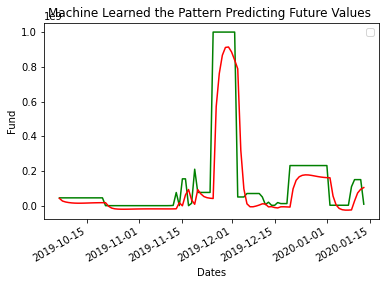

In [53]:
fig = plt.figure()

ax1= fig.add_subplot(111)

x = dates
y = True_Fund

y1 = Predicted_Fund

plt.plot(x,y, color="green")
plt.plot(x,y1, color="red")
# beautify the x-labels
plt.gcf().autofmt_xdate()
plt.xlabel('Dates')
plt.ylabel("Fund")
plt.title("Machine Learned the Pattern Predicting Future Values ")
plt.legend()